# CAR PRICE PREDICTION

---

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

**Loading data**

---

In [3]:
data = pd.read_csv('/kaggle/input/car-data/CarPrice_Assignment.csv')

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Analyzing**

---

In [5]:
data.shape

(205, 26)

In [6]:
data.drop(columns=['car_ID', 'CarName'], inplace=True)

In [7]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values*100
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(data).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
symboling,int64,0,0.000000,6,205,-2.000000,3.000000,0.834146
fueltype,object,0,0.000000,2,205,nan,nan,nan
aspiration,object,0,0.000000,2,205,nan,nan,nan
doornumber,object,0,0.000000,2,205,nan,nan,nan
carbody,object,0,0.000000,5,205,nan,nan,nan
drivewheel,object,0,0.000000,3,205,nan,nan,nan
enginelocation,object,0,0.000000,2,205,nan,nan,nan
wheelbase,float64,0,0.000000,53,205,86.600000,120.900000,98.756585
carlength,float64,0,0.000000,75,205,141.100000,208.100000,174.049268
carwidth,float64,0,0.000000,44,205,60.300000,72.300000,65.907805


In [8]:
data[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']].skew()

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
dtype: float64

> * We have 0 null values
> * We have 9 categorical columns and rest of them are integers
> * Compressionratio has outliers

**Visualising data**

---

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>],
       [<Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peakrpm'}>],
       [<Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

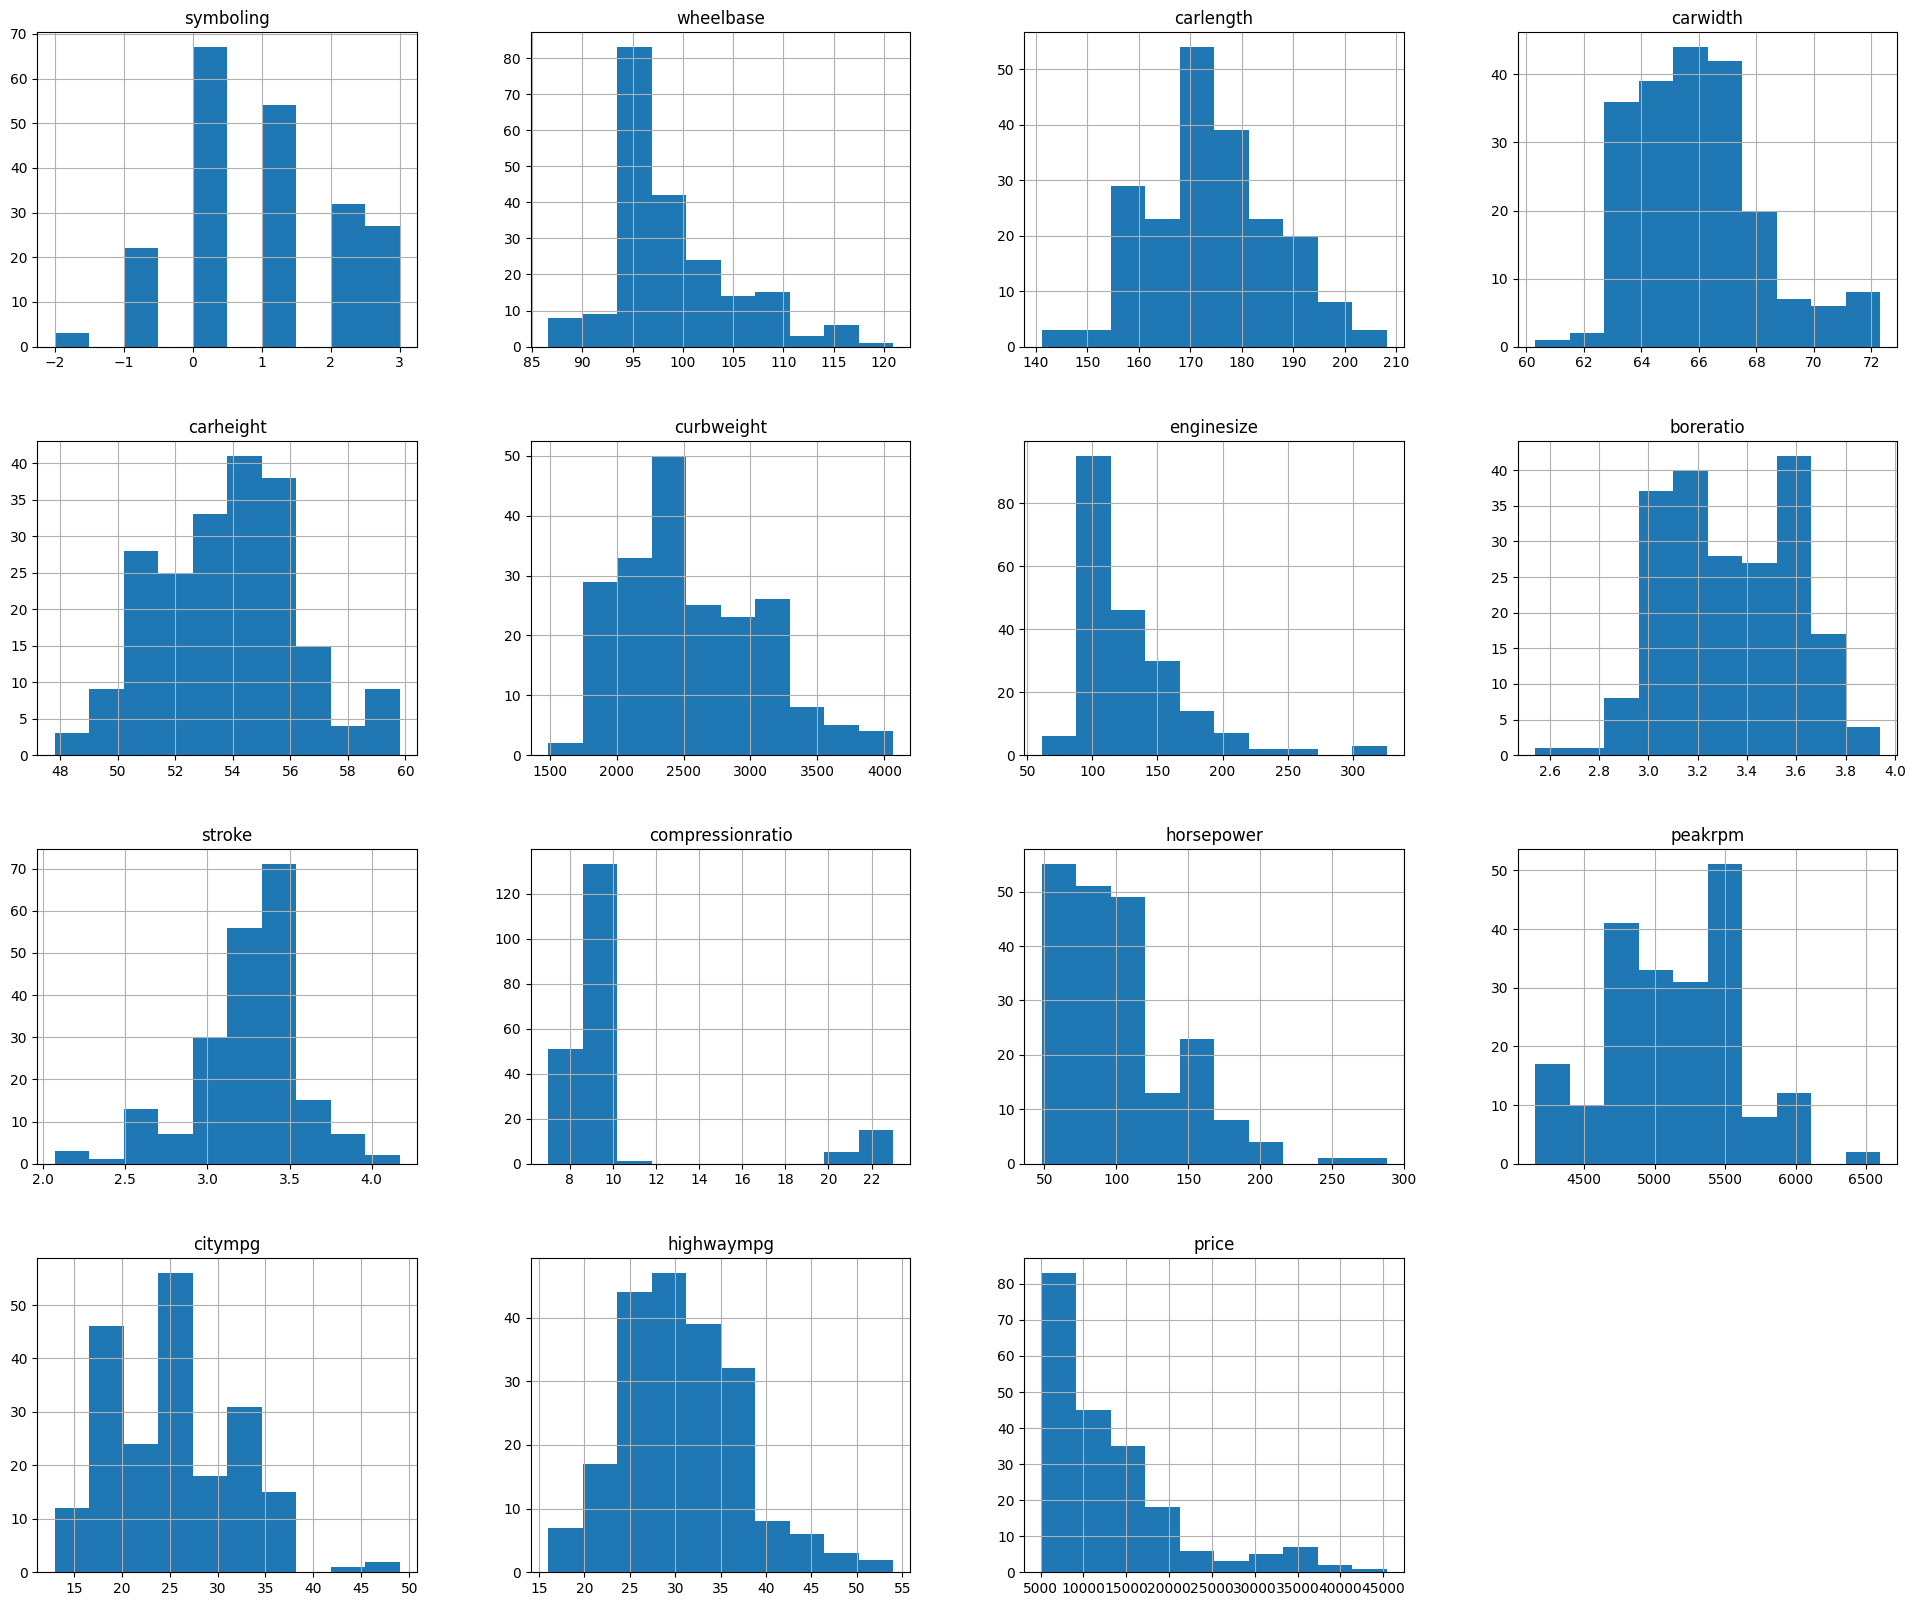

In [9]:
data.hist(figsize=(24, 20))

**Visualizing categorical columns**

---

<Axes: xlabel='fueltype', ylabel='count'>

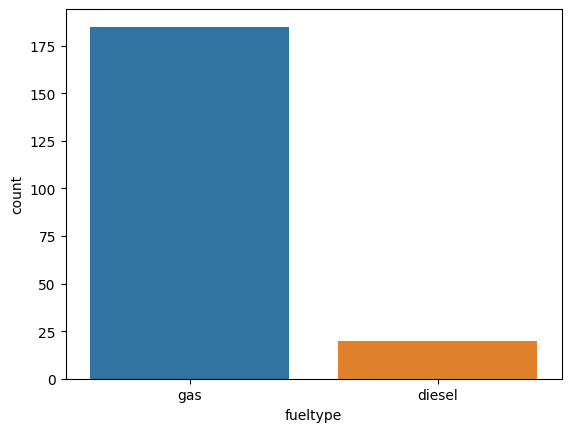

In [10]:
import seaborn as sns
sns.countplot(x=data['fueltype'])

<Axes: xlabel='aspiration', ylabel='count'>

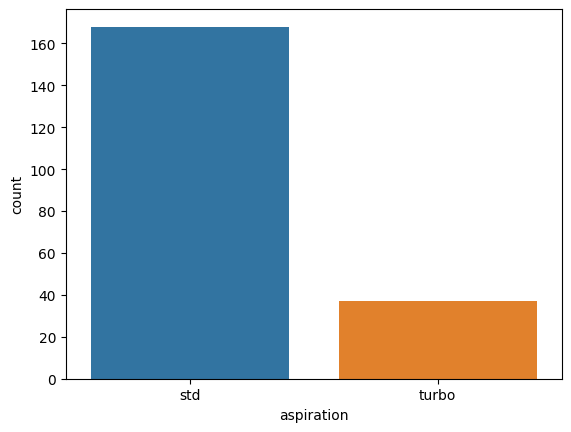

In [11]:
sns.countplot(x=data['aspiration'])

<Axes: xlabel='doornumber', ylabel='count'>

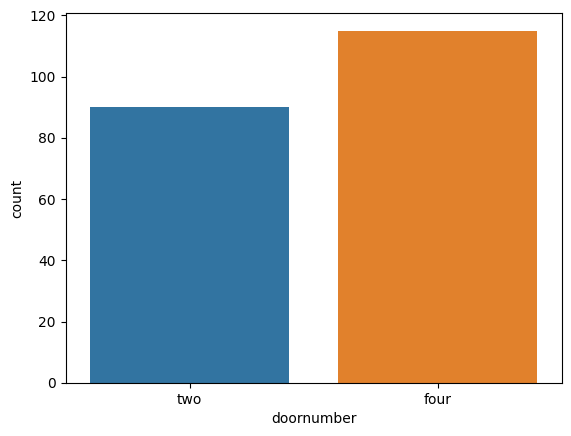

In [12]:
sns.countplot(x=data['doornumber'])

<Axes: xlabel='carbody', ylabel='count'>

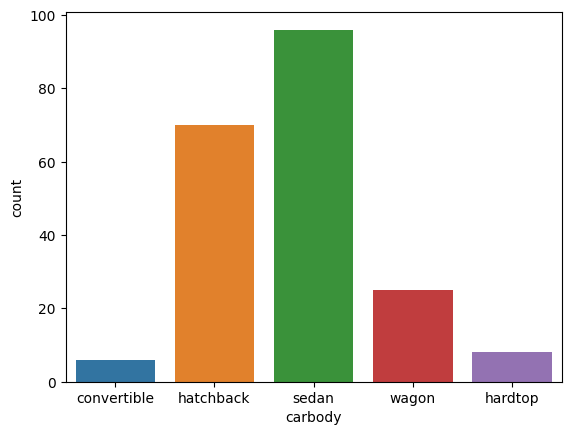

In [13]:
sns.countplot(x=data['carbody'])

<Axes: xlabel='drivewheel', ylabel='count'>

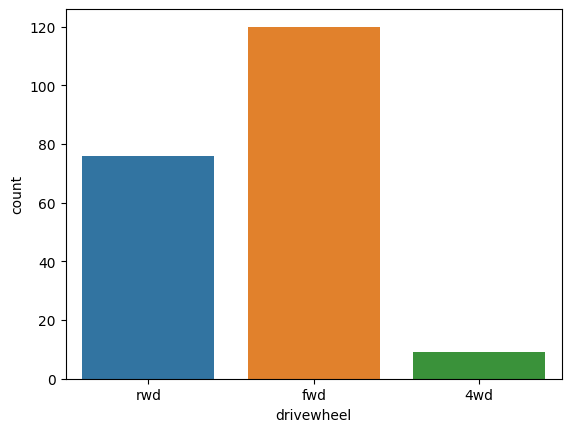

In [14]:
sns.countplot(x=data['drivewheel'])

<Axes: xlabel='enginelocation', ylabel='count'>

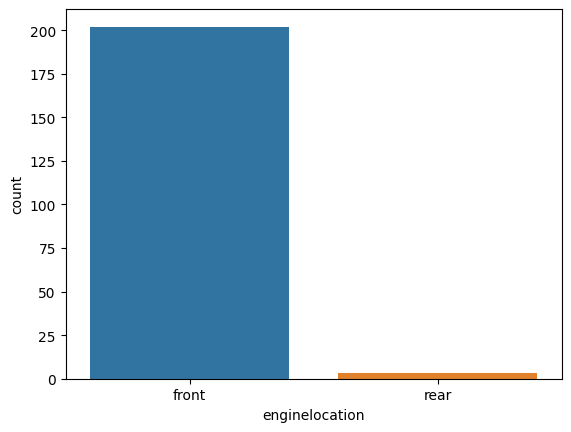

In [15]:
sns.countplot(x=data['enginelocation'])

<Axes: xlabel='enginetype', ylabel='count'>

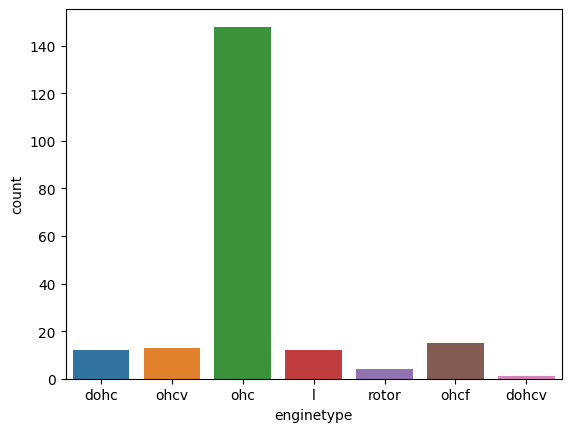

In [16]:
sns.countplot(x=data['enginetype'])

<Axes: xlabel='cylindernumber', ylabel='count'>

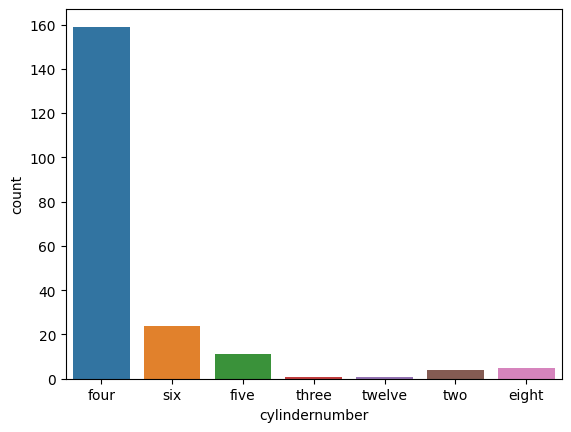

In [17]:
sns.countplot(x=data['cylindernumber'])

<Axes: xlabel='fuelsystem', ylabel='count'>

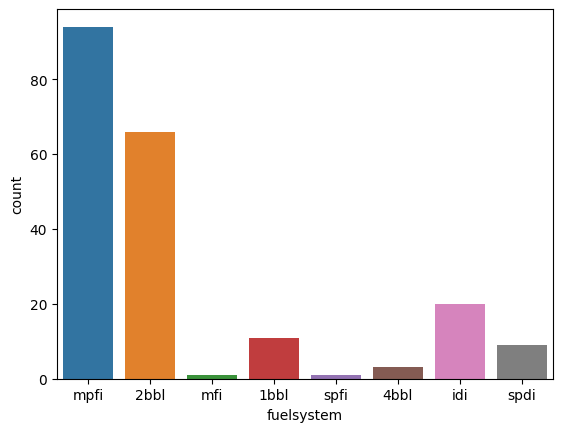

In [18]:
sns.countplot(x=data['fuelsystem'])

**Removing outliers**

---

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [23]:
low_leadtime,high_leadtime=remove_outlier(data['compressionratio'])
data['compressionratio']=np.where(data['compressionratio']>high_leadtime,high_leadtime,data['compressionratio'])
data['compressionratio']=np.where(data['compressionratio']<low_leadtime,low_leadtime,data['compressionratio'])

**Encoding categorical columns**

---

In [25]:
lst=[]
for i in data.columns:
    if data[i].dtype=='object':
        lst.append(i)
lst

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [28]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
data=pd.get_dummies(data,columns=['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem'])

In [29]:
data.shape

(205, 53)

**Applying models**

---

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
import xgboost as xgb

In [30]:
y = data['price']
x = data.drop(columns=['price'])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [35]:
lr = LinearRegression()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
ls = Lasso()
rd = Ridge()

In [36]:
lr.fit(x_train, y_train)
gb.fit(x_train, y_train)
rf.fit(x_train, y_train)
ls.fit(x_train, y_train)
rd.fit(x_train, y_train)

Ridge()

In [37]:
plrtr = lr.predict(x_train)
plrte = lr.predict(x_test)

pgbtr = gb.predict(x_train)
pgbte = gb.predict(x_test)

prftr = rf.predict(x_train)
prfte = rf.predict(x_test)

plstr = ls.predict(x_train)
plste = ls.predict(x_test)

prdtr = rd.predict(x_train)
prdte = rd.predict(x_test)

In [38]:
print(r2_score(y_train, plrtr))
print(r2_score(y_test, plrte))

0.9387450937876193
0.8839592012175543


In [39]:
print(r2_score(y_train, pgbtr))
print(r2_score(y_test, pgbte))

0.9940039372167675
0.9511714314281142


In [40]:
print(r2_score(y_train, prftr))
print(r2_score(y_test, prfte))

0.9875171514009213
0.9554492021406589


In [42]:
print(r2_score(y_train, plstr))
print(r2_score(y_test, plste))

0.9386844106484762
0.8893497025186052


In [43]:
print(r2_score(y_train, prdtr))
print(r2_score(y_test, prdte))

0.9326868128089326
0.9180301614576438


In [45]:
models = pd.DataFrame(
    {
        'Model' : ['LR', 'LR', 'GB', 'GB', 'RF', 'RF', 'LS', 'LS', 'RD', 'RD'],
        'Group' : [
            'train',
            'test',
            'train',
            'test', 
            'train',
            'test', 
            'train',
            'test',
            'train',
            'test',], 
        'Accuracy2' : [
            r2_score(y_test, plrte)*100,
            r2_score(y_test, plrte)*100,
            r2_score(y_test, pgbte)*100,
            r2_score(y_test, pgbte)*100,
            r2_score(y_test, prfte)*100,
            r2_score(y_test, prfte)*100,
            r2_score(y_test, plste)*100,
            r2_score(y_test, plste)*100,
            r2_score(y_test, prdte)*100,
            r2_score(y_test, prdte)*100,
        ]
        
    }
)

In [46]:
models

,Model,Group,Accuracy2
0,LR,train,88.395920
1,LR,test,88.395920
2,GB,train,95.117143
3,GB,test,95.117143
4,RF,train,95.544920
5,RF,test,95.544920
6,LS,train,88.934970
7,LS,test,88.934970
8,RD,train,91.803016
9,RD,test,91.803016


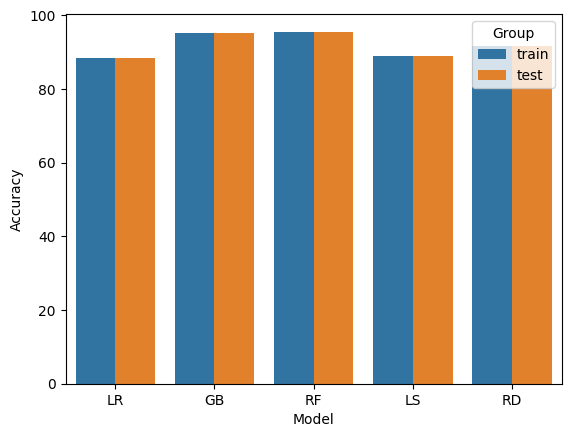

In [48]:
import matplotlib.pyplot as plt
sns.barplot(
    x='Model',
    y='Accuracy2',
    hue='Group',
    data= models
)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()